In [2]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.core import read, Stream
import pandas as pd

In [3]:
path = '/Users/sydneydybing/SW4/strain/usgs_rc-results/'
path2 = '/Users/sydneydybing/SW4/strain/M7_RC-results/'
stas = ['B072', 'B079', 'B082', 'B087', 'B916', 'B917', 'B918', 'B921']
test_stas = ['B917']

hoz_only = True

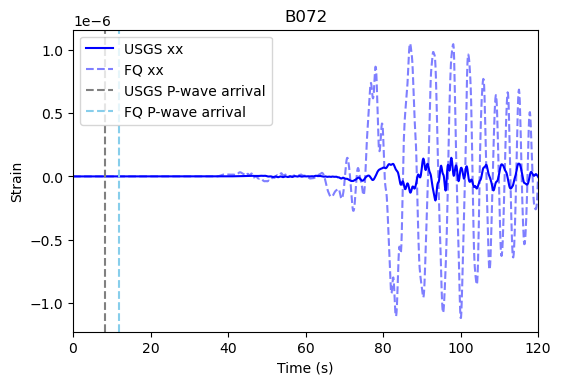

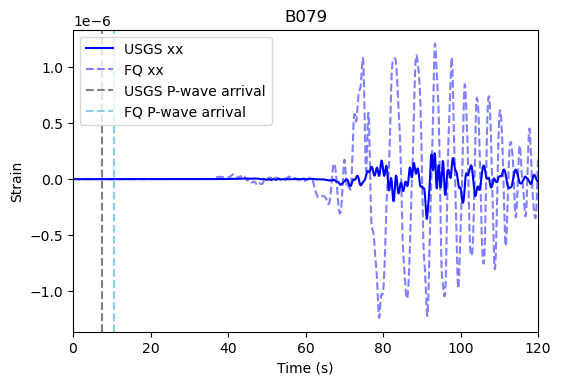

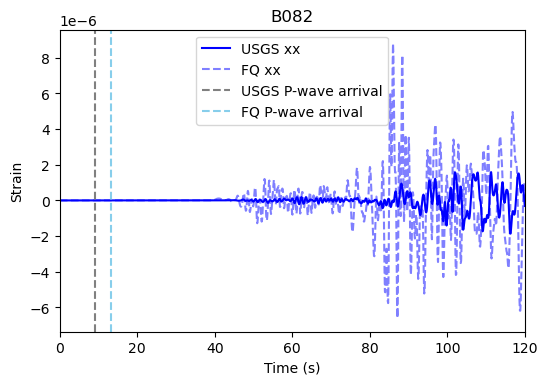

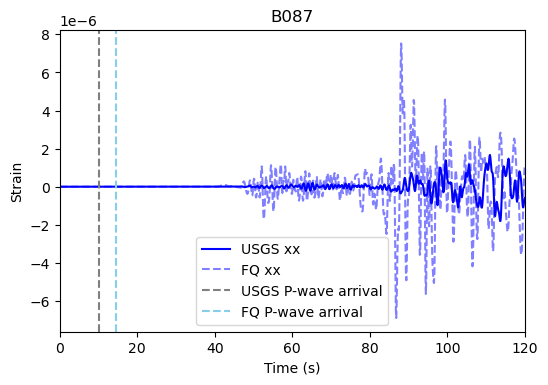

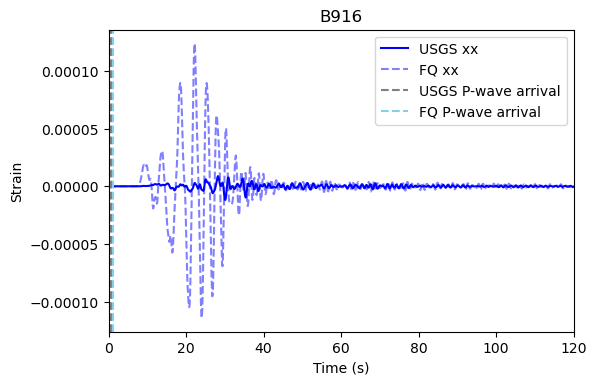

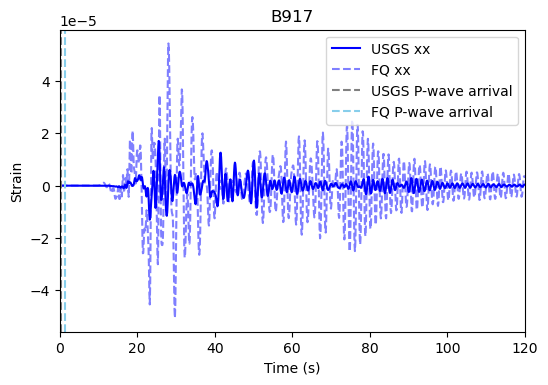

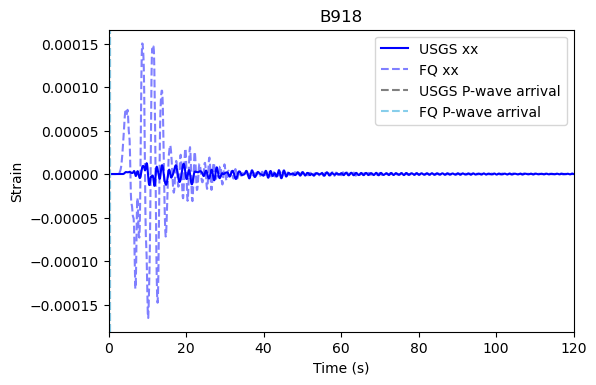

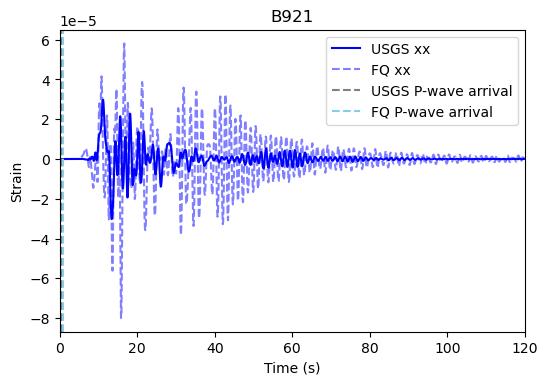

In [5]:
for sta in stas:
    
    strain_usgs = pd.read_csv(path + sta + '.txt', sep = '\s+', skiprows = 16, names = ['time', 'xx', 'yy', 'zz', 'xy', 'xz', 'yz'])
    strain_fq = pd.read_csv(path2 + sta + '.txt', sep = '\s+', skiprows = 16, names = ['time', 'xx', 'yy', 'zz', 'xy', 'xz', 'yz'])
    
    if hoz_only:
        xx_usgs = strain_usgs.xx.values
        xy_usgs = strain_usgs.xy.values
        yy_usgs = strain_usgs.yy.values
        
        rms_usgs = np.sqrt((xx_usgs**2 + xy_usgs**2 + yy_usgs**2)/3)
        
        xx_fq = strain_fq.xx.values
        xy_fq = strain_fq.xy.values
        yy_fq = strain_fq.yy.values
        
        rms_fq = np.sqrt((xx_fq**2 + xy_fq**2 + yy_fq**2)/3)
    
    else:
        xx_usgs = strain_usgs.xx.values
        xy_usgs = strain_usgs.xy.values
        xz_usgs = strain_usgs.xz.values
        yy_usgs = strain_usgs.yy.values
        yz_usgs = strain_usgs.yz.values
        zz_usgs = strain_usgs.zz.values
    
        rms = np.sqrt((xx_usgs**2 + xy_usgs**2 + xz_usgs**2 + yy_usgs**2 + yz_usgs**2 + zz_usgs**2)/6)
    
    try:
        i_usgs = np.where(rms_usgs > 0)[0]
        p_arr_idx_usgs = i_usgs[0]
        i_fq = np.where(rms_fq > 0)[0]
        p_arr_idx_fq = i_fq[0]
        
    except: 
        print(sta + ': no strain yet')
        continue # skips to next station if all the strain at this station is zeros
    
    # RMS USGS strain calculation
    rms_strain_usgs = rms_usgs
    rms_times_usgs = strain_usgs.time.values
    
    mod_rms_strain_usgs = rms_strain_usgs.copy()
    mod_rms_times_usgs = rms_times_usgs.copy()
    
    p_arr_strain_usgs = rms_strain_usgs[p_arr_idx_usgs]
    
    mod_rms_strain_usgs[:p_arr_idx_usgs] = p_arr_strain_usgs
    
    pst_strain_usgs = mod_rms_strain_usgs.copy()
    pst_times_usgs = mod_rms_times_usgs.copy()
    
    # Loop over samples
    for k in range(0,len(mod_rms_strain_usgs)): #avoid starting at zero

        if k == 0:
            strain = mod_rms_strain_usgs[0]
            max_strain = strain

        else:
            # Grab progressively longer windows and save the biggest strain
            strain = mod_rms_strain_usgs[:k+1] # Has to be k+1 because slicing doesn't include last one
            max_strain = max(strain)

        # Put peak strain back into the output stream
        pst_strain_usgs[k] = max_strain 
    
    # RMS FQ strain calculation
    rms_strain_fq = rms_fq
    rms_times_fq = strain_fq.time.values
    
    mod_rms_strain_fq = rms_strain_fq.copy()
    mod_rms_times_fq = rms_times_fq.copy()
    
    p_arr_strain_fq = rms_strain_fq[p_arr_idx_fq]
    
    mod_rms_strain_fq[:p_arr_idx_fq] = p_arr_strain_fq
    
    pst_strain_fq = mod_rms_strain_fq.copy()
    pst_times_fq = mod_rms_times_fq.copy()
    
    # Loop over samples
    for k in range(0,len(mod_rms_strain_fq)): #avoid starting at zero

        if k == 0:
            strain = mod_rms_strain_fq[0]
            max_strain = strain

        else:
            # Grab progressively longer windows and save the biggest strain
            strain = mod_rms_strain_fq[:k+1] # Has to be k+1 because slicing doesn't include last one
            max_strain = max(strain)

        # Put peak strain back into the output stream
        pst_strain_fq[k] = max_strain 
    
    # Make plot
    fig = plt.figure(dpi = 100)
    ax = fig.add_subplot(111)
    ax.set_title(sta)
    
    ax.plot(strain_usgs.time.values, xx_usgs, label = 'USGS xx', color = 'blue')
#     ax.plot(strain_usgs.time.values, xy_usgs, label = 'USGS xy', color = 'orange')
#     ax.plot(strain_usgs.time.values, yy_usgs, label = 'USGS yy', color = 'green')

#     ax2 = ax.twinx()
    ax.plot(strain_fq.time.values, xx_fq, label = 'FQ xx', color = 'blue', linestyle = '--', alpha = 0.5)
#     ax.plot(strain_fq.time.values, xy_fq, label = 'FQ xy', color = 'orange', linestyle = '--')
#     ax.plot(strain_fq.time.values, yy_fq, label = 'FQ yy', color = 'green', linestyle = '--')

#     ax.plot(rms_times_usgs, rms_strain_usgs, color = 'green', label = 'RMS USGS strain')
#     ax.plot(mod_rms_times_usgs, mod_rms_strain_usgs, color = 'blue', label = 'RMS USGS strain')
#     ax.plot(pst_times_usgs, pst_strain_usgs, color = 'red', label = 'Peak USGS strain')

#     ax.plot(rms_times_fq, rms_strain_fq, color = 'green', label = 'RMS FQ strain', linestyle = '--')
#     ax.plot(mod_rms_times_fq, mod_rms_strain_fq, color = 'blue', label = 'RMS FQ strain', linestyle = '--')
#     ax.plot(pst_times_fq, pst_strain_fq, color = 'red', label = 'Peak FQ strain', linestyle = '--')

#     ax.semilogy()

    ax.axvline(rms_times_usgs[i_usgs[0]], color = 'gray', linestyle = '--', label = 'USGS P-wave arrival')
    ax.axvline(rms_times_fq[i_fq[0]], color = 'skyblue', linestyle = '--', label = 'FQ P-wave arrival')
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Strain')
#     ax.set_xlim(0, strain_fq.time.values[:int(len(strain_fq.time.values)/2)][-1])
    ax.set_xlim(0, 120)
#     ax.set_ylim(min(xx_fq[:int(len(xx_fq)/2)])*1.1, max(xx_fq[:int(len(xx_fq)/2)])*1.1)
#     plt.ylim(10**-15, 10**-3)
    ax.legend()
#     ax2.legend()

    plt.show()
